# 05. Análise Quantitativa

1 - Importando e instalando bibliotecas

In [2]:
import investpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

c:\Users\akira\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


2- Importando dados

In [4]:
itsa4 = yf.download('ITSA4.SA', start= '2023-01-01', end= '2023-05-09')

[*********************100%***********************]  1 of 1 completed


In [5]:
itsa4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02 00:00:00-03:00,8.44,8.45,8.26,8.36,8.253272,15184400
2023-01-03 00:00:00-03:00,8.37,8.41,8.12,8.15,8.045954,17066200
2023-01-04 00:00:00-03:00,8.21,8.28,8.13,8.22,8.115061,18690300
2023-01-05 00:00:00-03:00,8.26,8.36,8.19,8.34,8.233528,26727900
2023-01-06 00:00:00-03:00,8.35,8.51,8.35,8.48,8.371740,20301100


In [6]:
itsa4 = itsa4.rename({"Close": "ITAU"}, axis=1)

In [7]:
itsa4.head()

,Open,High,Low,ITAU,Adj Close,Volume
Date,,,,,,
2023-01-02 00:00:00-03:00,8.44,8.45,8.26,8.36,8.253272,15184400
2023-01-03 00:00:00-03:00,8.37,8.41,8.12,8.15,8.045954,17066200
2023-01-04 00:00:00-03:00,8.21,8.28,8.13,8.22,8.115061,18690300
2023-01-05 00:00:00-03:00,8.26,8.36,8.19,8.34,8.233528,26727900
2023-01-06 00:00:00-03:00,8.35,8.51,8.35,8.48,8.371740,20301100


In [8]:
itsa4 = itsa4.drop(itsa4.columns[[0,1,2,4,5]], axis= 1 )

In [9]:
itsa4.head()

,ITAU
Date,
2023-01-02 00:00:00-03:00,8.36
2023-01-03 00:00:00-03:00,8.15
2023-01-04 00:00:00-03:00,8.22
2023-01-05 00:00:00-03:00,8.34
2023-01-06 00:00:00-03:00,8.48


3. Calculando os retornos

In [10]:
itau_retornos = itsa4.pct_change()

In [11]:
itau_retornos

,ITAU
Date,
2023-01-02 00:00:00-03:00,NaN
2023-01-03 00:00:00-03:00,-0.025120
2023-01-04 00:00:00-03:00,0.008589
2023-01-05 00:00:00-03:00,0.014599
2023-01-06 00:00:00-03:00,0.016786
...,...
2023-05-02 00:00:00-03:00,-0.034562
2023-05-03 00:00:00-03:00,-0.001193
2023-05-04 00:00:00-03:00,0.013142


4. Visualizações de Dados

<AxesSubplot:xlabel='Date'>

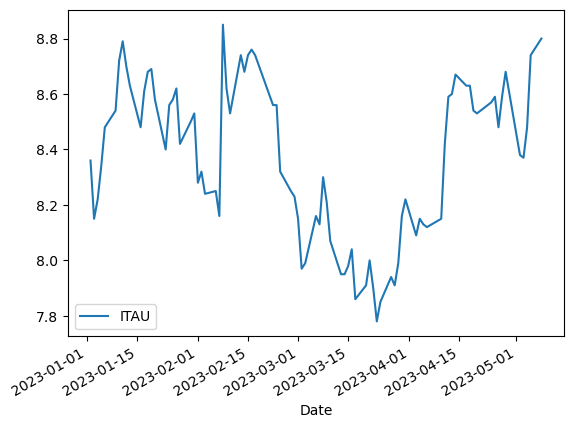

In [12]:
itsa4.plot()

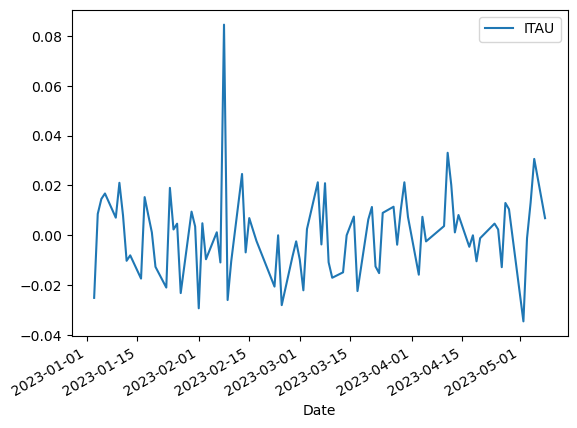

In [13]:
itau_retornos.plot();

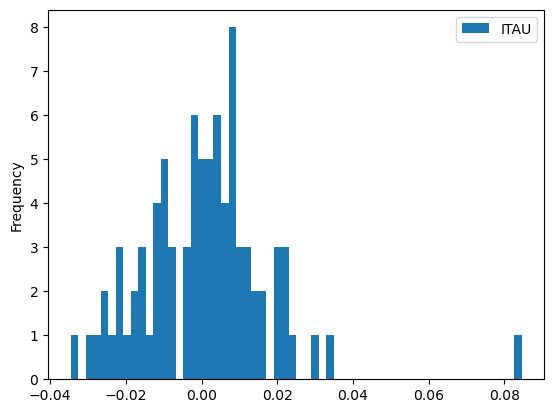

In [14]:
itau_retornos.plot.hist(bins=60);

5.Metricas

In [15]:
#Média
itau_retornos.mean()

ITAU    0.000743
dtype: float64

In [16]:
#Desvio Padrão

itau_retornos.std()

ITAU    0.016934
dtype: float64

In [17]:
itau_retornos.describe()

,ITAU
count,85.000000
mean,0.000743
std,0.016934
min,-0.034562
25%,-0.010429
50%,0.001214
75%,0.008589
max,0.084559


In [18]:
#Dowside risk


downside_itau = itau_retornos[itau_retornos['ITAU']<0]
downside_vol = np.std(downside_itau)

downside_vol

ITAU    0.00878
dtype: float64

6. Análise em janela de tempo

In [34]:
# Retorno médio - media movel

mm_20 = itau_retornos.rolling(window=20).mean

In [35]:
mm_20()

,ITAU
Date,
2023-01-02 00:00:00-03:00,NaN
2023-01-03 00:00:00-03:00,NaN
2023-01-04 00:00:00-03:00,NaN
2023-01-05 00:00:00-03:00,NaN
2023-01-06 00:00:00-03:00,NaN
...,...
2023-05-02 00:00:00-03:00,0.001424
2023-05-03 00:00:00-03:00,0.000997
2023-05-04 00:00:00-03:00,0.002444


In [23]:
mm_20.plot()

AttributeError: 'function' object has no attribute 'plot'

In [24]:
mm_precos_20 = itsa4.rolling(window=20).mean()

<AxesSubplot:xlabel='Date'>

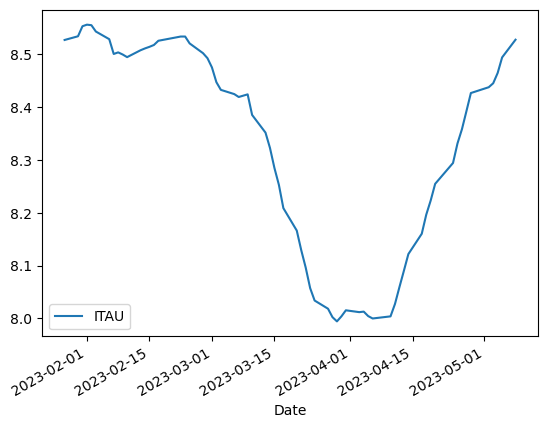

In [25]:
mm_precos_20.plot()

In [29]:
#Janela de volatilidade

vol_20 = itau_retornos.rolling(window=20).std()

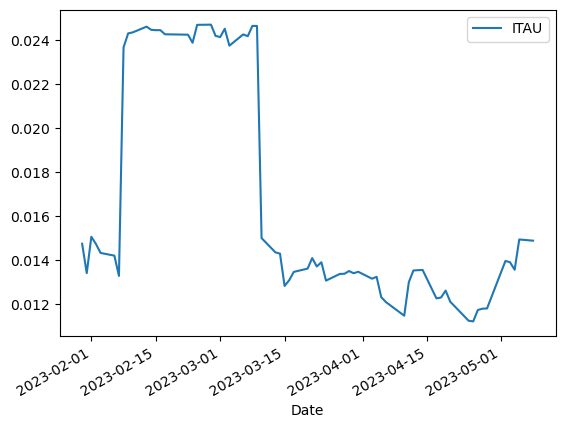

In [30]:
vol_20.plot();

In [37]:
#Drawdown

drawdown_20 = itau_retornos.rolling(window=20).min()


<AxesSubplot:xlabel='Date'>

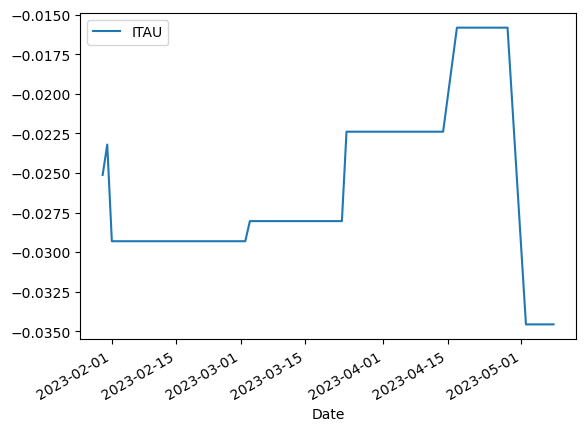

In [38]:
drawdown_20.plot()